In [4]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
tokenizer = ToktokTokenizer()
# stopword_list = nltk.corpus.stopwords.words('english')   
stopword_list = nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
!pip install textblob nltk gensim

     |████████████████████████████████| 24.0 MB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 75.8 MB/s eta 0:00:01
You should consider upgrading via the '/opt/app-root/bin/python3.9 -m pip install --upgrade pip' command.


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [20]:
df = pd.read_csv("consumer_complaints.csv")


In [21]:
df.head()


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074.0
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080.0
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473.0
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326.0
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067.0


In [22]:
df.dtypes


date_received                    object
product                          object
sub_product                      object
issue                            object
sub_issue                        object
consumer_complaint_narrative     object
company_public_response          object
company                          object
state                            object
zipcode                          object
tags                             object
consumer_consent_provided        object
submitted_via                    object
date_sent_to_company             object
company_response_to_consumer     object
timely_response                  object
consumer_disputed?               object
complaint_id                    float64
dtype: object

In [23]:
df.describe(include='all')


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
count,287944,287944,205374,287944,138620,32719,38258,287944,286650,287027,42715,61812,287943,287943,287943,287943,287943,2.879430e+05
unique,731,11,46,92,68,32132,9,3122,62,22572,3,4,6,786,5,2,2,NaN
top,08/27/2015,Mortgage,Other mortgage,Incorrect information on credit report,Debt is not mine,This company continues to report on my credit ...,Company chooses not to provide a public response,Bank of America,CA,300XX,Older American,Consent provided,Web,03/12/2014,Closed with explanation,Yes,No,NaN
freq,945,78660,26415,40681,19001,37,27268,18937,40632,587,24203,32719,205158,903,222422,280567,230259,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.083377e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.916342e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.099440e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.361265e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.085814e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336831e+06


In [24]:
df.isnull().sum()/df.shape[0]*100


date_received                    0.000000
product                          0.000000
sub_product                     28.675715
issue                            0.000000
sub_issue                       51.858695
consumer_complaint_narrative    88.637027
company_public_response         86.713389
company                          0.000000
state                            0.449393
zipcode                          0.318465
tags                            85.165518
consumer_consent_provided       78.533326
submitted_via                    0.000347
date_sent_to_company             0.000347
company_response_to_consumer     0.000347
timely_response                  0.000347
consumer_disputed?               0.000347
complaint_id                     0.000347
dtype: float64

In [25]:
df1 = df[['complaint_id','date_received','product','issue','company','state','submitted_via','company_response_to_consumer','timely_response','consumer_disputed?','consumer_complaint_narrative']]


In [26]:
df1 = df1[pd.notnull(df1['consumer_complaint_narrative'])]


## EDA
We’ll check the disribution of complaints by product category to understand which product received maximum complaints and 

other products which rarely receive complaints.



<AxesSubplot:xlabel='product', ylabel='count'>

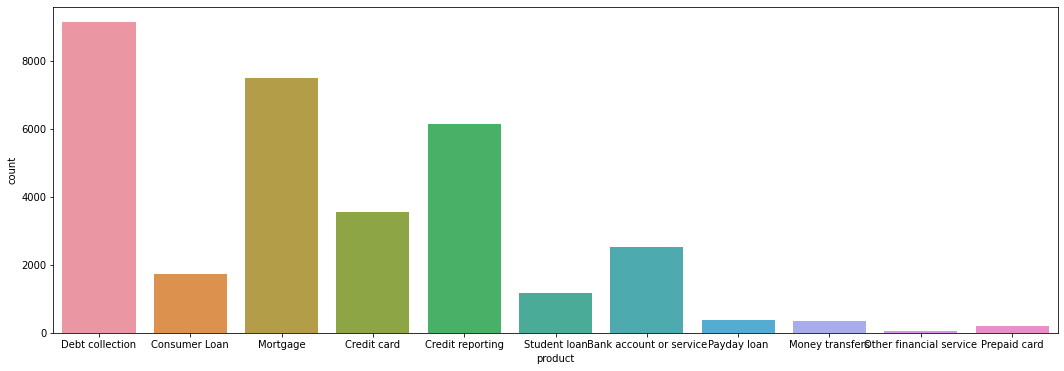

In [28]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='product',data=df1)

From this plot we can see Debt Collection and Mortgage received maximum number of complaints

We’ll now analyze the contingency table in form of plot to understand which product has more customer disputes on their complaints after resolving the issues

<AxesSubplot:xlabel='product'>

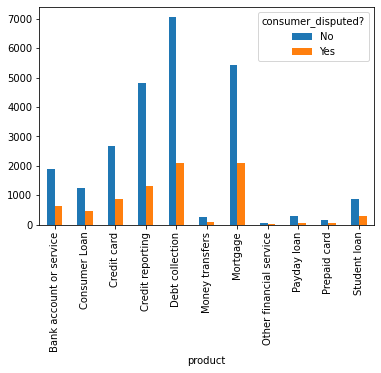

In [29]:
pd.crosstab(df1['product'],df1['consumer_disputed?']).plot(kind='bar')


Not much of difference in proportion of disputes raised by complaint for each product category.

Checking various plots to identify patterns within data

In [30]:
df1['date_received'] = pd.to_datetime(df1['date_received'])
df1.date_received.min(),df1.date_received.max()


(Timestamp('2015-03-19 00:00:00'), Timestamp('2015-10-23 00:00:00'))

<AxesSubplot:xlabel='month', ylabel='count'>

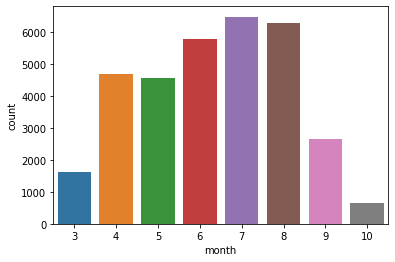

In [31]:
df1['month'] = df1['date_received'].dt.month
sns.countplot(x='month',data=df1)

<AxesSubplot:xlabel='timely_response', ylabel='count'>

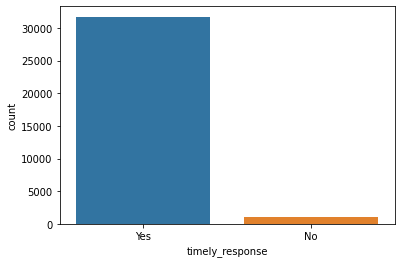

In [32]:
sns.countplot(x='timely_response',data=df1)


# Text Data Preprocessing


## Converting Text data to Lowercase


In [33]:
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))
df1['consumer_complaint_narrative'].sample(2)



216579    in 2010 i was giving an forgiveness loan from ...
280119    i was negotiating a settlement with pressler &...
Name: consumer_complaint_narrative, dtype: object

## Removing Punctuations


In [34]:
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")
df1['consumer_complaint_narrative'].sample(2)


278878    thank you for taking time to review my issue i...
281729    why are credit seekers punished for seeking th...
Name: consumer_complaint_narrative, dtype: object

## Text standardization


In [35]:
# #Below, we used three normalizazion dictionaries from these links :
# #http://www.hlt.utdallas.edu/~yangl/data/Text_Norm_Data_Release_Fei_Liu/
# #http://people.eng.unimelb.edu.au/tbaldwin/etc/emnlp2012-lexnorm.tgz
# #http://luululu.com/tweet/typo-corpus-r1.txt
# dico = {}
# dico1 = open('doc1.txt', 'rb')
# for word in dico1:
#     word = word.decode('utf8')
#     word = word.split()
#     dico[word[1]] = word[3]
# dico1.close()
# dico2 = open('doc2.txt', 'rb')
# for word in dico2:
#     word = word.decode('utf8')
#     word = word.split()
#     dico[word[0]] = word[1]
# dico2.close()
# dico3 = open('doc3.txt', 'rb')
# for word in dico3:
#     word = word.decode('utf8')
#     word = word.split()
#     dico[word[0]] = word[1]
# dico3.close()

FileNotFoundError: [Errno 2] No such file or directory: 'doc1.txt'

In [41]:
def txt_std(words):
    list_words = words.split()
    for i in range(len(list_words)):
        if list_words[i] in dico.keys():
            list_words[i] = dico[list_words[i]]
    return ' '.join(list_words)

In [42]:
df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].apply(txt_std)
df1.consumer_complaint_narrative.head(1)


190126    claimed owe 2700 years despite proof payment s...
Name: consumer_complaint_narrative, dtype: object

In [43]:

df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].str.replace(r"xx+\s","")
df1['consumer_complaint_narrative'].head(1)


190126    claimed owe 2700 years despite proof payment s...
Name: consumer_complaint_narrative, dtype: object

## Removing Stopwords


In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))
df1['consumer_complaint_narrative'].head(1)


190126    claimed owe 2700 years despite proof payment s...
Name: consumer_complaint_narrative, dtype: object

## Correcting Spelling


In [ ]:
##ensure text is standardized before applying this step
from textblob import TextBlob
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: str(TextBlob(x).correct()))

## Lemmatizing


In [ ]:
from textblob import Word

df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))
df1.consumer_complaint_narrative.head(1)


# Word Cloud for all Product categories


In [ ]:
for product_name in df1['product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df1.loc[df1['product'].str.contains(product_name),'consumer_complaint_narrative']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


### Train/Test split


In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(df1['consumer_complaint_narrative'], df1['product'],stratify=df1['product'], 
                                                    test_size=0.25)
Feature engineering of consumer complaint with TF-IDF
##label encoding target variable
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)



In [ ]:

##tf-idf verctor representation
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df1['consumer_complaint_narrative'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,train_y)


In [ ]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [ ]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)


In [ ]:

final_lr = LogisticRegression(C=5)
final_lr.fit(xtrain_tfidf,train_y)


In [ ]:
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [ ]:
final_lr_predict = final_lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(final_lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, final_lr_predict,target_names=df1['product'].unique()))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, final_lr_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We have acheived an accuracy of around 85% with a Logistic Regression model and the classification metrics are good for all departments except Payday loan - this might be due to less training instances of this product category and also on looking at the confusion matrix it is mostly being predicted as Credit reporting or debt collection which gives us an indication that this product is similar to one another or maybe linked with other.

We might further improve the performance using Random Forest, SVM, GBM, Neural Networks and utilize hyperparameter tuning.

### SVM

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,train_y)



In [ ]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [ ]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)


In [ ]:

final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,train_y)


In [ ]:
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [ ]:
final_svc_predict = final_svc.predict(xvalid_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, valid_y)
print ("SVC > Accuracy: ", svc_accuracy)


In [ ]:
print(classification_report(valid_y, final_svc_predict,target_names=df1['product'].unique()))

In [ ]:

conf_mat = confusion_matrix(valid_y, final_svc_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
XGBOOST


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
xgb_model.fit(xtrain_tfidf_final, train_y)



In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
       n_estimators=80, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=4, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8)


In [ ]:
xgb_predict = xgb_model.predict(xvalid_tfidf_final)
xgb_accuracy = metrics.accuracy_score(xgb_predict, valid_y)
print ("XGBoost > Accuracy: ", xgb_accuracy)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, xgb_predict,target_names=df1['product'].unique()))


In [ ]:

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, xgb_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
Deep Learning models


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential


In [ ]:

#total_complaints = np.append(train_x.values,valid_x.values)
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(train_x.values)#total_complaints
train_sequences = tokenizer.texts_to_sequences(train_x.values)
test_sequences = tokenizer.texts_to_sequences(valid_x.values)


In [ ]:

word_index = tokenizer.word_index# dictionary containing words and their index
print('Found %s unique tokens.' % len(word_index))


In [ ]:

MAX_SEQUENCE_LENGTH = max([len(c.split()) for c in total_complaints])
MAX_SEQUENCE_LENGTH


In [ ]:

train_data = pad_sequences(train_sequences, maxlen=max_length,padding='post')
test_data = pad_sequences(test_sequences, maxlen=max_length,padding='post')
print(train_data.shape)
print(test_data.shape)


In [ ]:

enc = preprocessing.LabelEncoder()
train_labels = enc.fit_transform(train_y)
test_labels = enc.fit_transform(valid_y)

print(enc.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))


In [ ]:

labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)



## CNN w/ Pre-trained word embeddings(GloVe)
We’ll use pre-trained embeddings such as Glove which provides word based vector representation trained on a large corpus.

It is trained on a dataset of one billion tokens (words) with a vocabulary of 400 thousand words. The glove has embedding vector sizes, including 50, 100, 200 and 300 dimensions.


In [ ]:

#wget http://nlp.stanford.edu/data/glove.6B.zip
GLOVE_DIR = '/mnt/data/temp/nlp/'
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))



Now lets create the embedding matrix using the word indexer created from tokenizer.


In [ ]:

EMBEDDING_DIM = 300
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [ ]:
Lets check the word embedded vector representation for token ‘loan’ in our embedding matrix


In [ ]:


[(k,v) for k,v in word_index.items() if v==4]


In [ ]:
embedding_matrix[4]  ## word embedded vector representation for token 'loan'

In [ ]:
vocab_size = len(tokenizer.word_index)+1


Now we load this embedding matrix into an Embedding layer using Sequential API to form a Convolutional NeuralNet model.
Dropout is applied between the hidden layers to factor regularization and prevent overfitting of neural network.



In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy',
 optimizer="rmsprop",
 metrics=['acc'])


In [ ]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))


In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

After 3 epochs the CNN tends to be overfitting the training data and therefore we need to implement early stopping to prevent such instances of overfitting and tune the number of epochs during training.



In [ ]:
#predictions on test data
predicted=model.predict(test_data)
predicted

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))

In [ ]:
print(classification_report(labels_test, predicted.round(),target_names=df1['product'].unique()))


Now, we’ll initialize our Embedding layer from scratch and learning its weights during training instead of using a pre-trained word embeddings and build a small 1D convnet to solve our classification problem.



In [ ]:
#The Embedding layer requires the specification of the vocabulary size (vocab_size), 
#the size of the real-valued vector space EMBEDDING_DIM = 100,
#and the maximum length of input documents max_length .
vocab_size = len(tokenizer.word_index)+1
EMBEDDING_DIM = 300
max_length = 394

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,
 300,
 input_length=max_length
 ))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy',
 optimizer="rmsprop",
 metrics=['acc'])

In [ ]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves :CNN',fontsize=16)
plt.show()

In [ ]:
#predictions on test data
predicted=model.predict(test_data)
predicted

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted.round()))

In [ ]:
## RNN

In [ ]:
#Bidirectional LSTM

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True))
model.add(Bidirectional(LSTM(100, dropout_U = 0.2, dropout_W = 0.2)))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])


In [ ]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN - LSTM',fontsize=16)
plt.show()

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves :RNN - LSTM',fontsize=16)
plt.show()

In [ ]:
#predictions on test data
predicted=model.predict(test_data)
predicted

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))
print("############################")

In [ ]:
print(classification_report(labels_test, predicted.round(),target_names=df1['product'].unique()))


After hours of training we get good results with LSTM(type of recurrent neural network) compared to CNN. From the learning curves it is clear the model needs to be tuned for overfitting by selecting hyperparameters such as no of epochs via early stopping and dropout for regularization.

We could further improve our final result by ensembling our xgboost and Neural network models by using Logistic Regression as our base model.

